In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

import tensorflow as tf
keras = tf.keras

from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM

In [2]:
mtar_data = pd.read_csv('/kaggle/input/nse-defence-stocks-india/MTARTECH.NS.csv', index_col='Date')

In [3]:
mtar_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-15,1050.000000,1154.900024,860.000000,969.450012,965.979675,25391972
2021-03-22,973.900024,1076.300049,960.150024,1017.700012,1014.057007,3862032
2021-03-29,1017.700012,1059.000000,990.900024,1045.650024,1041.906860,785632
2021-04-05,1050.000000,1070.000000,1007.150024,1028.349976,1024.668823,1307413
2021-04-12,1018.000000,1019.200012,943.049988,949.799988,946.400024,1092794


<AxesSubplot:xlabel='Date'>

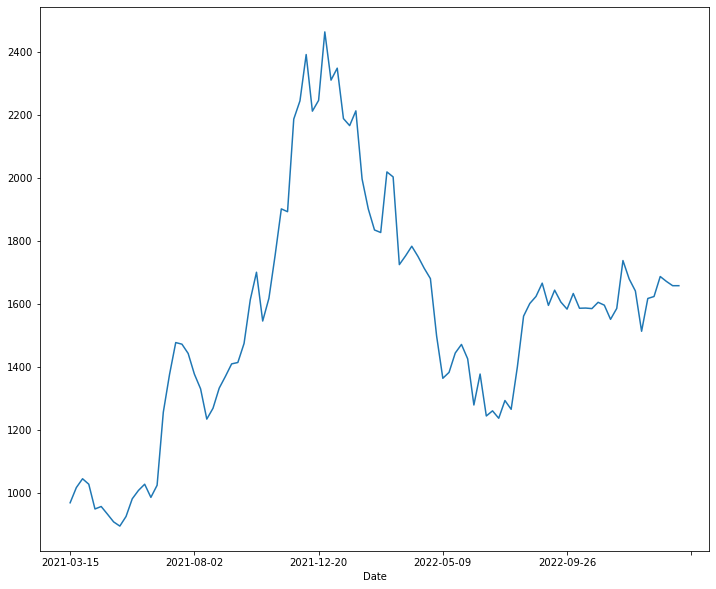

In [4]:
mtar_data['Close'].plot(figsize=(12,10))

In [5]:
mtar_data = mtar_data.dropna()

In [6]:
scaled_mtar_data = scaler.fit_transform(mtar_data)

In [7]:
scaled_mtar_data.shape

(99, 6)

In [8]:
look_back = 6

mtar_data_generator = TimeseriesGenerator(scaled_mtar_data, scaled_mtar_data, length=look_back, batch_size=1)

In [9]:
mtar_model = Sequential()

n_features = scaled_mtar_data.shape[1]

mtar_model.add(LSTM(128, activation='relu', return_sequences=True , input_shape=(look_back,n_features)))
mtar_model.add(LSTM(256, activation='relu', return_sequences=True, input_shape=(look_back,n_features)))
mtar_model.add(LSTM(512, activation='relu',  input_shape=(look_back,n_features)))

mtar_model.add(Dense(n_features))

mtar_model.compile(optimizer='adam', loss='mse')

2023-02-04 04:10:30.370603: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [10]:
mtar_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 6, 128)            69120     
_________________________________________________________________
lstm_1 (LSTM)                (None, 6, 256)            394240    
_________________________________________________________________
lstm_2 (LSTM)                (None, 512)               1574912   
_________________________________________________________________
dense (Dense)                (None, 6)                 3078      
Total params: 2,041,350
Trainable params: 2,041,350
Non-trainable params: 0
_________________________________________________________________


In [11]:
mtar_model.fit(mtar_data_generator, epochs=500)

2023-02-04 04:10:40.536077: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/500
93/93 [==============================] - 8s 31ms/step - loss: 0.0406
Epoch 2/500
93/93 [==============================] - 3s 32ms/step - loss: 0.0179
Epoch 3/500
93/93 [==============================] - 3s 31ms/step - loss: 0.0171
Epoch 4/500
93/93 [==============================] - 3s 31ms/step - loss: 0.0129
Epoch 5/500
93/93 [==============================] - 3s 30ms/step - loss: 0.0130
Epoch 6/500
93/93 [==============================] - 3s 32ms/step - loss: 0.0192
Epoch 7/500
93/93 [==============================] - 3s 33ms/step - loss: 0.0113
Epoch 8/500
93/93 [==============================] - 3s 30ms/step - loss: 0.0096
Epoch 9/500
93/93 [==============================] - 3s 31ms/step - loss: 0.0094
Epoch 10/500
93/93 [==============================] - 3s 30ms/step - loss: 0.0120
Epoch 11/500
93/93 [==============================] - 3s 32ms/step - loss: 0.0078
Epoch 12/500
93/93 [==============================] - 3s 33ms/step - loss: 0.0070
Epoch 13/500
93/93 [=====

In [12]:
mtar_model.save('/kaggle/working/mtar_model.h5')

<AxesSubplot:>

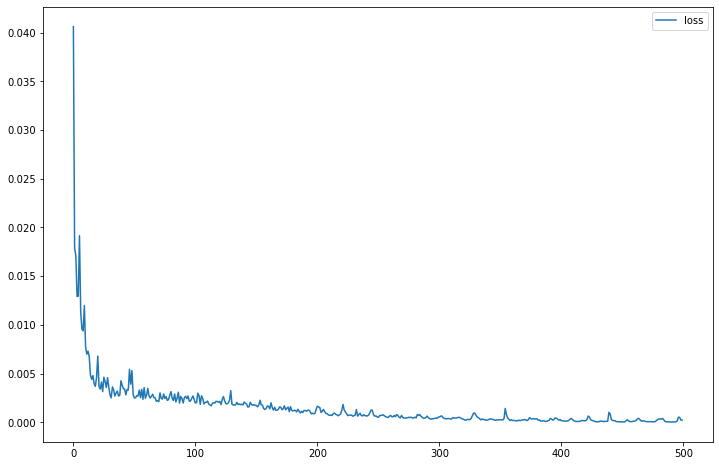

In [16]:
mtar_loss = pd.DataFrame(mtar_model.history.history)
mtar_loss.plot(figsize=(12,8))

In [17]:
# for exporting important objects of model
import joblib

# create PKL files of important objects required for project
# these are required for prediction of future stock prices and also for the flask app
joblib.dump(scaler, "/kaggle/working/scaler.pkl")
joblib.dump(scaled_mtar_data, "/kaggle/working/scaled_mtar_data.pkl")
joblib.dump(look_back, "/kaggle/working/look_back.pkl")

['/kaggle/working/look_back.pkl']